# Exploração do dataset da Agrisolus
---
### Autor: Alexandre Marcondes

**Objetivo**: aplicar o algoritmo de decision tree para realizar uma regressão linear nos dados da Agrisolus.

### Bibliotecas

In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

### Arquivo csv

In [2]:
path = './agrisolus_ml/'

agri1 = 'agrisolus.csv'

pesos = pd.read_csv(path+agri1, sep=';')

In [3]:
print('Pesos:')
print(pesos.shape)
print(pesos.head())

Pesos:
(2075588, 15)
   Unnamed: 0                 Data     Peso  Umidade  Temperatura  idLote  \
0           0  2019-04-06 07:10:35  20.5748      0.0          0.0       2   
1           1  2019-04-06 07:10:43  42.5538     68.2         32.1       2   
2           2  2019-04-06 07:10:58  33.6798     67.9         32.1       2   
3           3  2019-04-06 07:12:12  25.7238     68.6         32.1       2   
4           4  2019-04-06 07:13:19  39.4938     68.8         32.0       2   

   idLinhagem  idBalanca       DataAlojamento                     Sexo  \
0          15    2843900  2019-04-06 06:30:00  Fêmeas Cobb MV GT Foods   
1          15    2861839  2019-04-06 06:30:00  Fêmeas Cobb MV GT Foods   
2          15    2861839  2019-04-06 06:30:00  Fêmeas Cobb MV GT Foods   
3          15    2861839  2019-04-06 06:30:00  Fêmeas Cobb MV GT Foods   
4          15    2861839  2019-04-06 06:30:00  Fêmeas Cobb MV GT Foods   

   PesoChegada            DataAbate  Idade  PesoEsperado  DiffPeso  
0 

In [4]:
pesos.drop('Unnamed: 0', axis=1,inplace=True)

### Explorando o dataset

In [5]:
pesos.idLote.value_counts()

2    1091059
1     984529
Name: idLote, dtype: int64


Como são dois lotes presentes nos dados, os lotes serão analisados separadamente.

Para a construção do modelo preditivo, todos os dados foram considerados somente a partir do dia 15 de idade.


Text(0.5, 0, 'Idade')

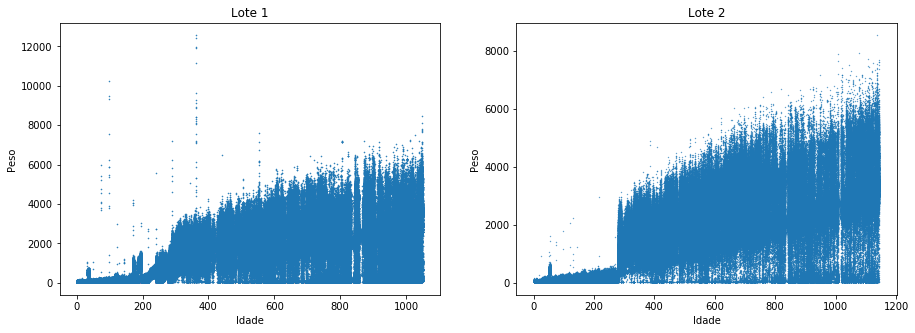

In [175]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
# plot do lote 1
axs[0].scatter(x=pesos[pesos.idLote==1].Idade,y=pesos[pesos.idLote==1].Peso, s=0.3)
axs[0].set_title('Lote 1')
axs[0].set_ylabel('Peso')
axs[0].set_xlabel('Idade')
# Plot do lote 2
axs[1].scatter(x=pesos[pesos.idLote==2].Idade,y=pesos[pesos.idLote==2].Peso, s=0.1)
axs[1].set_title('Lote 2')
axs[1].set_ylabel('Peso')
axs[1].set_xlabel('Idade')

### Tentativa de modelagem com decision tree
---

In [7]:
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

plt.rcParams['agg.path.chunksize'] = 10000

#### Modelo para o lote 1

In [123]:
# Regressão será feita considerando somente o lote 1
X = pesos[(pesos.idLote==1) & (pesos.Idade>15)].loc[:,['Idade']]
y = pesos[(pesos.idLote==1) & (pesos.Idade>15)].loc[:,['Peso']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=True)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(831251, 1) (146692, 1)
(831251, 1) (146692, 1)


In [124]:
tree = DecisionTreeRegressor()
tree.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [125]:
T = np.linspace(min(X_test.values.ravel()), max(X_test.values.ravel()), 500)[:,np.newaxis]
y_tree = tree.predict(T)

R2:  0.5748842070631575


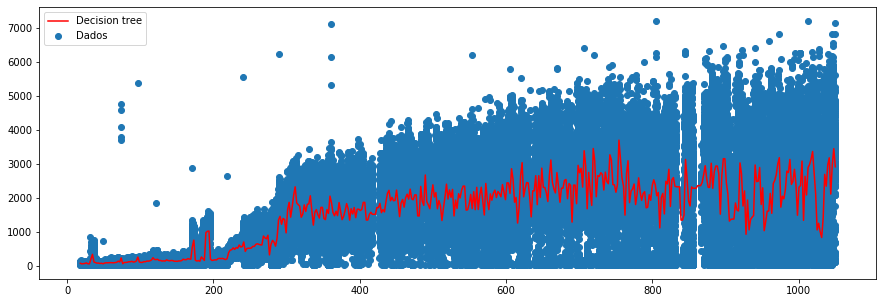

In [126]:
print('R2: ', r2_score(y_test,tree.predict(X_test)))

fig,axis = plt.subplots(figsize=(15,5))
axis.plot(T,y_tree, color='r')
axis.scatter(X_test,y_test)
axis.legend(['Decision tree','Dados'])

#### Modelo para o lote 2

In [128]:
# Regressão será feita considerando somente o lote 1
X = pesos[(pesos.idLote==2) & (pesos.Idade>15)].loc[:,['Idade']]
y = pesos[(pesos.idLote==2) & (pesos.Idade>15)].loc[:,['Peso']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=True)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(921152, 1) (162557, 1)
(921152, 1) (162557, 1)


In [129]:
tree = DecisionTreeRegressor()
tree.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [130]:
T = np.linspace(min(X_test.values.ravel()), max(X_test.values.ravel()), 500)[:,np.newaxis]
y_tree = tree.predict(T)

R2:  0.6308876651778732


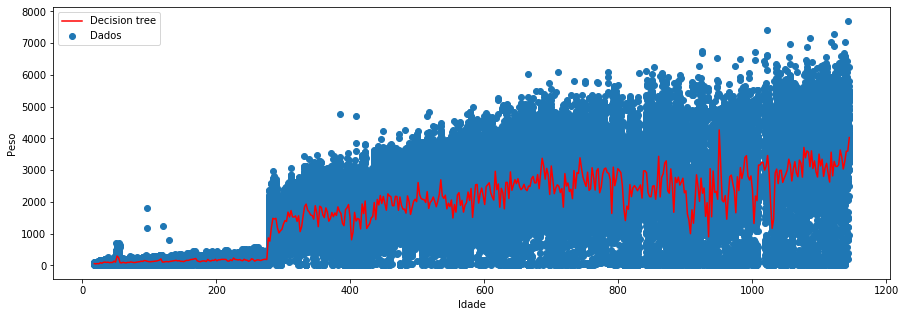

In [131]:
print('R2: ', r2_score(y_test,tree.predict(X_test)))

fig,axis = plt.subplots(figsize=(15,5))
axis.plot(T,y_tree, color='r')
axis.scatter(X_test,y_test)
axis.set_xlabel('Idade')
axis.set_ylabel('Peso')
axis.legend(['Decision tree','Dados'])

### Melhoria dos dados
---

Exclusão de valores que variam abruptamente.

Valores que tenham diferença maior a 10, em relação ao valor esperado, serão excluídos.


In [132]:
peso_corrigido = pesos[(pesos.DiffPeso<100) & (pesos.DiffPeso>-100)]

In [133]:
peso_corrigido.shape

(530000, 14)

In [134]:
peso_corrigido.head()

,Data,Peso,Umidade,Temperatura,idLote,idLinhagem,idBalanca,DataAlojamento,Sexo,PesoChegada,DataAbate,Idade,PesoEsperado,DiffPeso
0,2019-04-06 07:10:35,20.5748,0.0,0.0,2,15,2843900,2019-04-06 06:30:00,Fêmeas Cobb MV GT Foods,38.0,2019-05-25 09:30:00,0,42.0,-21.4252
1,2019-04-06 07:10:43,42.5538,68.2,32.1,2,15,2861839,2019-04-06 06:30:00,Fêmeas Cobb MV GT Foods,38.0,2019-05-25 09:30:00,0,42.0,0.5538
2,2019-04-06 07:10:58,33.6798,67.9,32.1,2,15,2861839,2019-04-06 06:30:00,Fêmeas Cobb MV GT Foods,38.0,2019-05-25 09:30:00,0,42.0,-8.3202
3,2019-04-06 07:12:12,25.7238,68.6,32.1,2,15,2861839,2019-04-06 06:30:00,Fêmeas Cobb MV GT Foods,38.0,2019-05-25 09:30:00,0,42.0,-16.2762
4,2019-04-06 07:13:19,39.4938,68.8,32.0,2,15,2861839,2019-04-06 06:30:00,Fêmeas Cobb MV GT Foods,38.0,2019-05-25 09:30:00,0,42.0,-2.5062


Text(0.5, 0, 'Idade')

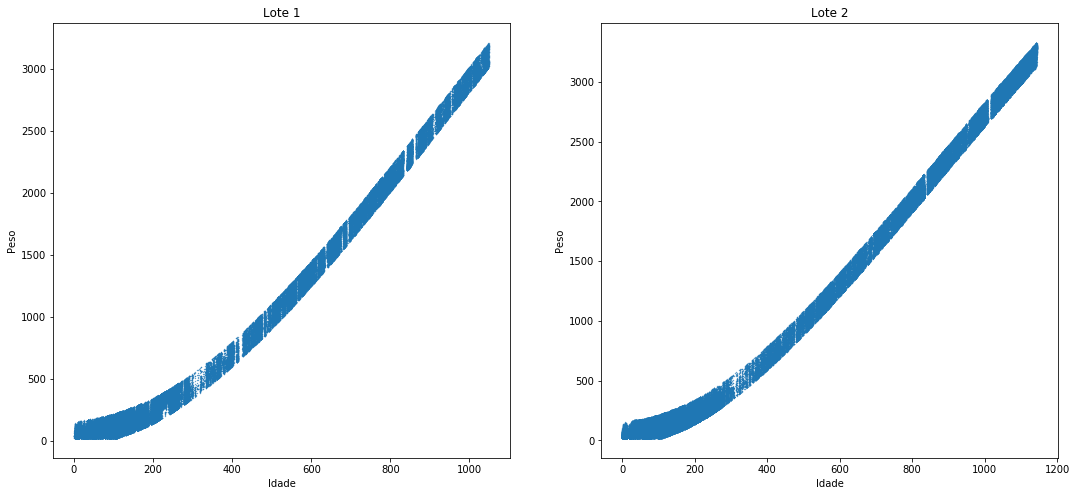

In [135]:
fig, axs = plt.subplots(1,2, figsize=(18,8))
# plot do lote 1
axs[0].scatter(x=peso_corrigido[peso_corrigido.idLote==1].Idade,y=peso_corrigido[peso_corrigido.idLote==1].Peso, s=0.1)
axs[0].set_title('Lote 1')
axs[0].set_ylabel('Peso')
axs[0].set_xlabel('Idade')
# Plot do lote 2
axs[1].scatter(x=peso_corrigido[peso_corrigido.idLote==2].Idade,y=peso_corrigido[peso_corrigido.idLote==2].Peso, s=0.1)
axs[1].set_title('Lote 2')
axs[1].set_ylabel('Peso')
axs[1].set_xlabel('Idade')

#### Modelagem para o lote 1

In [136]:
# Regressão será feita considerando somente o lote 1
X = peso_corrigido[(peso_corrigido.idLote==1) & (peso_corrigido.Idade>15)].loc[:,['Idade']]
y = peso_corrigido[(peso_corrigido.idLote==1) & (peso_corrigido.Idade>15)].loc[:,['Peso']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=True)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(204743, 1) (36132, 1)
(204743, 1) (36132, 1)


In [137]:
tree = DecisionTreeRegressor()
tree.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [138]:
T = np.linspace(min(X_test.values.ravel()), max(X_test.values.ravel()), 500)[:,np.newaxis]
y_tree = tree.predict(T)

R2:  0.9971349974341933


Text(0, 0.5, 'Peso')

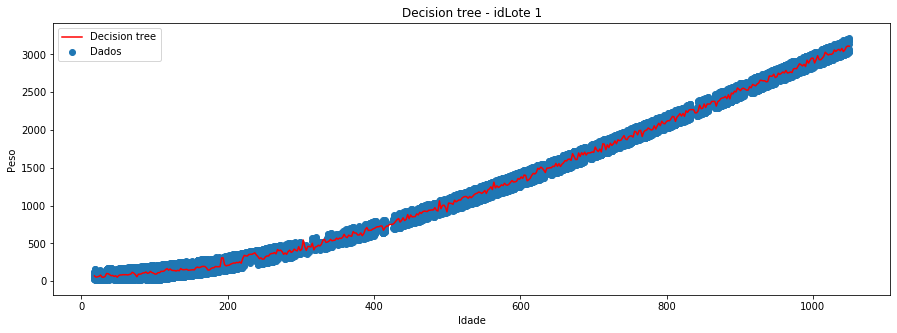

In [139]:
print('R2: ', r2_score(y_test,tree.predict(X_test)))

fig,axis = plt.subplots(figsize=(15,5))
axis.plot(T,y_tree, color='r')
axis.scatter(X_test,y_test)
axis.legend(['Decision tree','Dados'])
axis.set_title('Decision tree - idLote 1')
axis.set_xlabel('Idade')
axis.set_ylabel('Peso')

#### Modelagem para o lote 2

In [143]:
# Regressão será feita considerando somente o lote 1
X = peso_corrigido[(peso_corrigido.idLote==2) & (pesos.Idade>15)].loc[:,['Idade']]
y = peso_corrigido[(peso_corrigido.idLote==2) & (pesos.Idade>15)].loc[:,['Peso']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=True)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

/home/alexandremarcondes/miniconda3/envs/python_env/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/alexandremarcondes/miniconda3/envs/python_env/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


(233948, 1) (41285, 1)
(233948, 1) (41285, 1)


In [144]:
tree = DecisionTreeRegressor()
tree.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [145]:
T = np.linspace(min(X_test.values.ravel()), max(X_test.values.ravel()), 500)[:,np.newaxis]
y_tree = tree.predict(T)

R2:  0.9979844317903508


Text(0, 0.5, 'Peso')

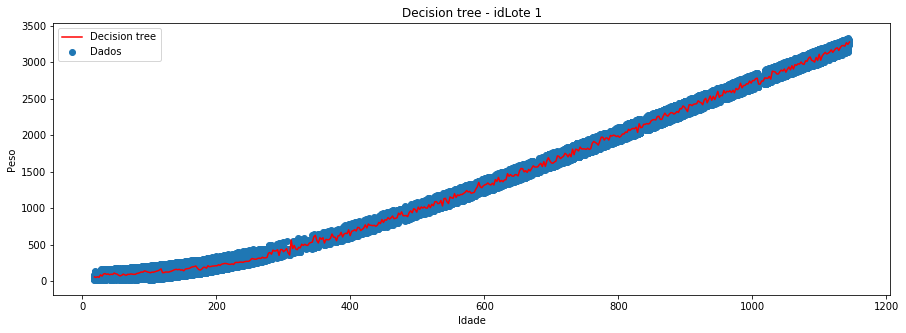

In [146]:
print('R2: ', r2_score(y_test,tree.predict(X_test)))

fig,axis = plt.subplots(figsize=(15,5))
axis.plot(T,y_tree, color='r')
axis.scatter(X_test,y_test)
axis.legend(['Decision tree','Dados'])
axis.set_title('Decision tree - idLote 1')
axis.set_xlabel('Idade')
axis.set_ylabel('Peso')

In [147]:
pesos.corr()

,Peso,Umidade,Temperatura,idLote,idLinhagem,idBalanca,PesoChegada,Idade,PesoEsperado,DiffPeso
Peso,1.000000,0.041619,-0.191583,0.069038,-0.069038,-0.006531,NaN,0.680386,0.642630,0.668365
Umidade,0.041619,1.000000,0.860991,-0.507837,0.507837,0.419167,NaN,0.152752,0.157726,-0.099345
Temperatura,-0.191583,0.860991,1.000000,-0.508240,0.508240,0.430429,NaN,-0.191160,-0.172393,-0.080208
idLote,0.069038,-0.507837,-0.508240,1.000000,-1.000000,0.509881,NaN,0.066415,0.038396,0.051938
idLinhagem,-0.069038,0.507837,0.508240,-1.000000,1.000000,-0.509881,NaN,-0.066415,-0.038396,-0.051938
idBalanca,-0.006531,0.419167,0.430429,0.509881,-0.509881,1.000000,NaN,0.061618,0.046832,-0.053906
PesoChegada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Idade,0.680386,0.152752,-0.191160,0.066415,-0.066415,0.061618,NaN,1.000000,0.989635,-0.081543
PesoEsperado,0.642630,0.157726,-0.172393,0.038396,-0.038396,0.046832,NaN,0.989635,1.000000,-0.140396
DiffPeso,0.668365,-0.099345,-0.080208,0.051938,-0.051938,-0.053906,NaN,-0.081543,-0.140396,1.000000


### Consideração de outras features no modelo
---
O modelo melhora caso outras features sejam adicionadas no atributos de classificação?

#### Lote 1 - considerando os dados sem correção

In [168]:
# Regressão será feita considerando somente o lote 1
X1 = pesos[(pesos.idLote==1) & (pesos.Idade>15)].loc[:,['Idade']]
X2 = pesos[(pesos.idLote==1) & (pesos.Idade>15)].loc[:,['Idade','Umidade']]
X3 = pesos[(pesos.idLote==1) & (pesos.Idade>15)].loc[:,['Idade','Temperatura']]
X4 = pesos[(pesos.idLote==1) & (pesos.Idade>15)].loc[:,['Idade','Umidade','Temperatura']]
X5 = pesos[(pesos.idLote==1) & (pesos.Idade>15)].loc[:,['Umidade','Temperatura']]

y = pesos[(pesos.idLote==1) & (pesos.Idade>15)].loc[:,['Peso']]

In [169]:
# Considerando somente a idade
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.15, shuffle=True)
tree = DecisionTreeRegressor()
tree.fit(X1_train,y_train)
y_pred_1 = tree.predict(X1_test)
R2_1 = r2_score(y_test,y_pred_1)
# Considerando idade e umidade
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.15, shuffle=True)
tree = DecisionTreeRegressor()
tree.fit(X2_train,y_train)
y_pred_2 = tree.predict(X2_test)
R2_2 = r2_score(y_test,y_pred_2)
# Considerando idade e temperatura
X3_train, X3_test, y_train, y_test = train_test_split(X3, y, test_size=0.15, shuffle=True)
tree = DecisionTreeRegressor()
tree.fit(X3_train,y_train)
y_pred_3 = tree.predict(X3_test)
R2_3 = r2_score(y_test,y_pred_3)
# Considerando idade, umidade e temperatura
X4_train, X4_test, y_train, y_test = train_test_split(X4, y, test_size=0.15, shuffle=True)
tree = DecisionTreeRegressor()
tree.fit(X4_train,y_train)
y_pred_4 = tree.predict(X4_test)
R2_4 = r2_score(y_test,y_pred_4)
# Considerando umidade e temperatura
X5_train, X5_test, y_train, y_test = train_test_split(X5, y, test_size=0.15, shuffle=True)
tree = DecisionTreeRegressor()
tree.fit(X5_train,y_train)
y_pred_5 = tree.predict(X5_test)
R2_5 = r2_score(y_test,y_pred_5)

In [170]:
print('R2 (Idade): ', R2_1)
print('R2 (Idade, umidade): ', R2_2)
print('R2 (Idade, temperatura): ', R2_3)
print('R2 (Idade, umidade, temperatura): ', R2_4)
print('R2 (Umidade, temperatura): ', R2_5)

R2 (Idade):  0.5768722773617854
R2 (Idade, umidade):  0.7018685947585581
R2 (Idade, temperatura):  0.7176425966853399
R2 (Idade, umidade, temperatura):  0.7936737141743442
R2 (Umidade, temperatura):  0.5559408499738647


#### Lote 1 - considerando os dados corrigidos

In [171]:
# Regressão será feita considerando somente o lote 1
X1 = peso_corrigido[(peso_corrigido.idLote==1) & (peso_corrigido.Idade>15)].loc[:,['Idade']]
X2 = peso_corrigido[(peso_corrigido.idLote==1) & (peso_corrigido.Idade>15)].loc[:,['Idade','Umidade']]
X3 = peso_corrigido[(peso_corrigido.idLote==1) & (peso_corrigido.Idade>15)].loc[:,['Idade','Temperatura']]
X4 = peso_corrigido[(peso_corrigido.idLote==1) & (peso_corrigido.Idade>15)].loc[:,['Idade','Umidade','Temperatura']]
X5 = peso_corrigido[(peso_corrigido.idLote==1) & (peso_corrigido.Idade>15)].loc[:,['Umidade','Temperatura']]

y = peso_corrigido[(peso_corrigido.idLote==1) & (peso_corrigido.Idade>15)].loc[:,['Peso']]

In [172]:
# Considerando somente a idade
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.15, shuffle=True)
tree = DecisionTreeRegressor()
tree.fit(X1_train,y_train)
y_pred_1 = tree.predict(X1_test)
R2_1 = r2_score(y_test,y_pred_1)
# Considerando idade e umidade
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.15, shuffle=True)
tree = DecisionTreeRegressor()
tree.fit(X2_train,y_train)
y_pred_2 = tree.predict(X2_test)
R2_2 = r2_score(y_test,y_pred_2)
# Considerando idade e temperatura
X3_train, X3_test, y_train, y_test = train_test_split(X3, y, test_size=0.15, shuffle=True)
tree = DecisionTreeRegressor()
tree.fit(X3_train,y_train)
y_pred_3 = tree.predict(X3_test)
R2_3 = r2_score(y_test,y_pred_3)
# Considerando idade, umidade e temperatura
X4_train, X4_test, y_train, y_test = train_test_split(X4, y, test_size=0.15, shuffle=True)
tree = DecisionTreeRegressor()
tree.fit(X4_train,y_train)
y_pred_4 = tree.predict(X4_test)
R2_4 = r2_score(y_test,y_pred_4)
# Considerando idade, umidade e temperatura
X5_train, X5_test, y_train, y_test = train_test_split(X5, y, test_size=0.15, shuffle=True)
tree = DecisionTreeRegressor()
tree.fit(X5_train,y_train)
y_pred_5 = tree.predict(X5_test)
R2_5 = r2_score(y_test,y_pred_5)

In [176]:
print('R2 (Idade): ', R2_1)
print('R2 (Idade, umidade): ', R2_2)
print('R2 (Idade, temperatura): ', R2_3)
print('R2 (Idade, umidade, temperatura): ', R2_4)
print('R2 (umidade, temperatura): ', R2_5)

R2 (Idade):  0.997099523895961
R2 (Idade, umidade):  0.9973227074207849
R2 (Idade, temperatura):  0.997404971630448
R2 (Idade, umidade, temperatura):  0.9972555151668743
R2 (umidade, temperatura):  0.9036900874580927


### Conclusões

* Os dados de variação de peso não fazem tanto sentido, pois há variações muito grandes no peso de aves do mesmo lote no mesmo dia.
* Uma correção foi aplicada aos dados, excluindo variações diárias de peso acima de 100 g.
* Com a correção dos dados, há uma aproximação dos dados em relação a curva teórica da variação do peso de uma ave.
* A adição de outras features não alteram o R2 obtido utilizando os dados corrigidos. A utilização da idade é suficiente.
* Como os atributos de temperatura e umidade possuem baixa correlação, há uma queda no valor do R2 ao utilizar somente esses dois atributos.